In [2]:
#new working document which uses the data generated from nasa instead with different units

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from astropy import units as u
from astropy import constants as const
from astropy.modeling.models import BlackBody
from scipy.interpolate import interp1d

In [4]:
#Inputting and modelling the data

def input_spectra(gasname, filepath, isheader, separation, wavelengthunits, wavelengthcol, datacol):
    """
    This function input_spectra loads in the datafile for the spectral information and assigns values to the wavelength and spectral data.
    
    Parameters include:
        - gasname         : user inputs the name of the gas 
        - filepath        : input file with at least one column for wavelength given in nanometers (nm) or micrometres (um)
                            and one column for spectral line intensity. Needs to be contained within "".  
        - isheader        : parameter takes in whether there is a header in the file. None means there is no header present
        - separation      : parameter takes in what the separation between the variables within the file
                            e.g. "\t" means values separated by a tab
        - wavelengthunits : enter the units of the wavelength data, input "um" or "nm", function will convert units into um. 
        - wavelengthcol   : user inputs which column consists of the wavelength values
        - datacol         : user inputs which column consists of the spectra data values
    """

    #Inputs the data file
    gas_raw_data = pd.read_csv(filepath, header = isheader, sep = separation).values #stores the file into a variable 
    gas_wavelength = (gas_raw_data[:,wavelengthcol]).astype(float) #variable stores the wavelength range
    gas_absorption_line_data = (gas_raw_data[:,datacol]).astype(float) #variable stores the absorption line data for each line 
    
    if wavelengthunits == "um":
        gas_wavelength = gas_wavelength #leaves the wavelength units in micrometres (um)
    elif wavelengthunits == "nm": 
        gas_wavelength = (gas_wavelength/1000.0) #converts the wavelength units into micrometres (um)
    else:
        print("Please input the wavelength as um or nm")
    
    #Modelling the absorption lines as a Lorentzian
    

    return gasname, gas_wavelength, gas_absorption_line_data

In [19]:
#Testing function using own data (NASA PSG)
gasname, spectra_wav, spectra_data = input_spectra('Acetylene (NASA PSG)', '/home/samhitasodhi/Gas Sensor Project/Code - Nicholas Morley/New Code/psg_trn.txt', None, ' ', 'um', 0, 2)

In [26]:
# Function plots spectra for a given file 

def plot_spectra(gasname, spectra_wav, spectra_data, plot_min, plot_max):
   """
   This function provides a plotting facility for the input gas data file. 

   The parameters include: 
      - gasname         : input requires the name of the gas
      - spectra_wav     : loads in the wavelengths 
      - spectra_data    : loads in the spectral data  
      - plot_min        : user can input minimum value for the x-axis (wavelength)
      - plot_max        : user can input maximum value for the x-axis (wavelength)
   """

   gas_wavelength = spectra_wav
   gas_absorption_line_data = spectra_data

   figure(figsize=(15, 4))
   plt.plot(gas_wavelength, gas_absorption_line_data)
   plt.xlim([plot_min, plot_max])
   plt.title('Transmittance spectrum of' + ' ' + gasname + ' ' + 'gas')
   plt.xlabel('Wavelength (um)')
   plt.ylabel('Transmittance')
   plt.show()
   
   return

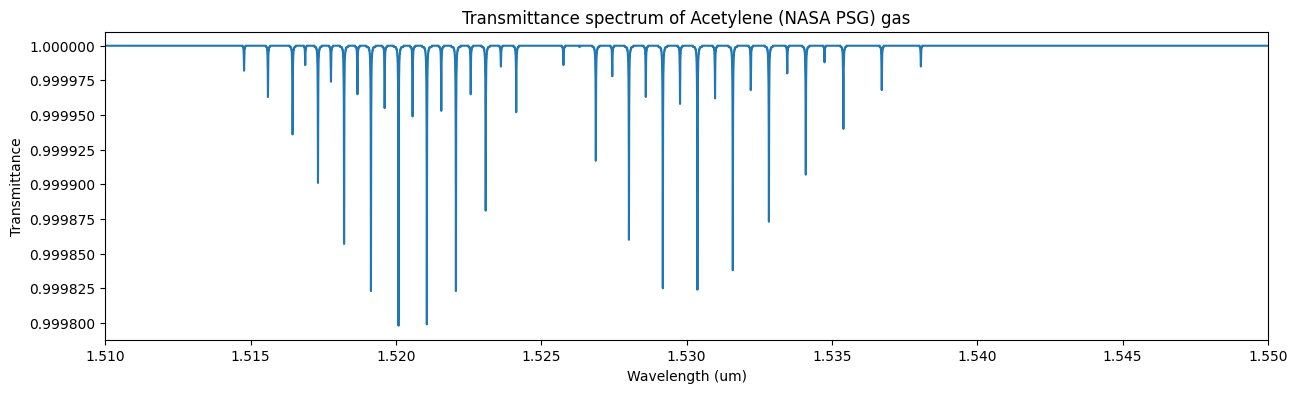

In [27]:
#Testing plot function
plot_spectra(gasname, spectra_wav, spectra_data, 1.51, 1.55)

In [8]:
# def blackbodyabsorption(wavelength, spectra_data, temp, plot_min, plot_max): 
#    """
#    Function returns a blackbody radiation curve at the chosen temperature with the absorption of the provided gas. 

#    The parameters include: 
#       - wavelength      : loads in the wavelengths
#       - spectra_data    : loads in the spectral data
#       - temp            : temperature of the blackbody
#       - plot_min        : user can input minimum value for the x-axis (wavelength)
#       - plot_max        : user can input maximum value for the x-axis (wavelength)
#    """

#    bb = BlackBody(temperature = temp*u.K)
#    wavelength_units = (wavelength*u.um)
#    flux = bb(wavelength_units)
#    transmittance = spectra_data
#    transmitted_intensity = transmittance*flux

#    figure(figsize=(15, 4))
#    plt.plot(wavelength, transmitted_intensity)
#    plt.xlim([plot_min,plot_max])
#    plt.title('Blackbody absorption spectrum of' + ' ' + gasname + ' ' + 'gas')
#    plt.xlabel('Wavelength (um)')
#    plt.ylabel('Transmittance (%)')
#    plt.show()

#    return flux, transmitted_intensity

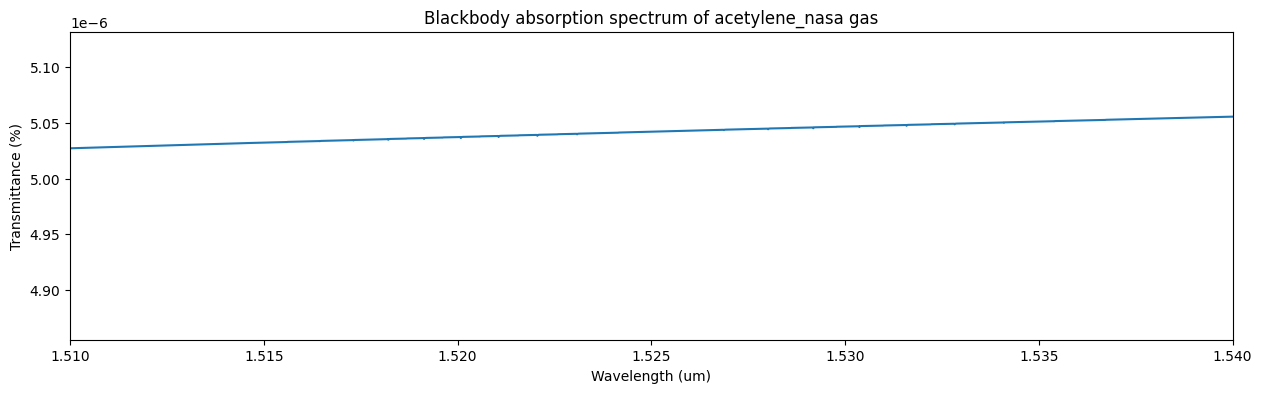

In [9]:
#flux, transmitted_intensity = blackbodyabsorption(spectra_wav, spectra_data, 3000, 1.51, 1.54)

In [24]:
#Converting from flux units (J/cm2 nm s sr) to photon counts (photons/nm sec)

def convert_fluxunits_to_photoncounts(wavelength, flux, emission_coefficient, area, solid_angle):
    """

    Parameters: 
        - flux                  : input flux value to be converted into photon counts
        - emisson_coefficient   : requires the emission coefficient of the light source filament at a 
                                  particular temperature 
        - area                  : area of the fibre cross-section (cm^2)
        - solid_angle           : solid angle (steradians) that reaches the fibre core of a particular 
                                  diameter
    """
    tc = emission_coefficient
    A = area
    sr = solid_angle

    photoncount = ((tc*flux*A*sr)*wavelength)/(1e9*const.c*const.h)
    photoncount_value = photoncount.value

    figure(figsize=(15, 4))
    plt.plot(wavelength, photoncount_value)
    plt.title('Photon counts (per nm per sec) for' + ' ' + gasname + ' ' + 'gas')
    plt.xlabel('Wavelength (um)')
    plt.ylabel('Photons / nm sec')
    plt.show()

    return photoncount_value

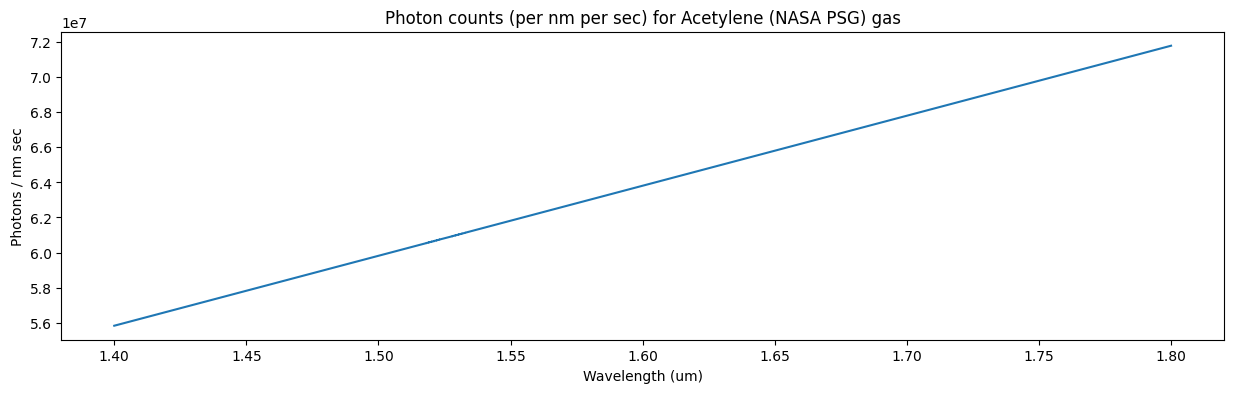

[55834141.96810132 55834181.8496313  55834221.73116127 ...
 71786674.19592746 71786714.07745743 71786753.95898741]


In [25]:
#testing unit conversion function

photoncount_value = convert_fluxunits_to_photoncounts(spectra_wav, spectra_data, 0.35, 0.000000503, 0.045)
print(photoncount_value)